#### In this example, we will explore the use of various classifiers from the scikit-learn package. Again, we'll use the modified Video Store data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vstable = pd.read_csv("../../data/Video_Store_2.csv", index_col=0)

vstable.shape

(50, 7)

In [3]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


#### Let's separate the target attribute and the attributes used for model training

In [4]:
vs_records = vstable[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']]
vs_records.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre
Cust ID,,,,,,
1,M,45000,25,32,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action


In [5]:
vs_target = vstable.Incidentals
vs_target.head()

Cust ID
1    Yes
2     No
3     No
4    Yes
5    Yes
Name: Incidentals, dtype: object

#### Next, we use Pandas "get_dummies" function to create dummy variables. 

In [6]:
vs_matrix = pd.get_dummies(vs_records[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']])
vs_matrix.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1
3,32000,20,42,1.6,1,0,0,1,0
4,59000,70,16,4.2,1,0,0,0,1
5,37000,35,25,3.2,0,1,1,0,0
6,18000,20,29,1.7,0,1,1,0,0
7,29000,45,19,3.8,1,0,0,0,1
8,74000,25,31,2.4,0,1,1,0,0
9,38000,21,18,2.1,0,1,0,1,0


#### Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation". 

In [7]:

# train_test_split shuffles the data and splits it into two splits for you. 
from sklearn.model_selection import train_test_split 
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

# 80% training - 20% test
print (vs_test.shape)
vs_test[0:5]

(10, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,18000,20,29,1.7,0,1,1,0,0
28,57000,52,22,4.1,0,1,0,1,0
38,41000,38,20,3.3,0,1,0,0,1
16,17000,19,26,2.2,0,1,1,0,0
41,50000,33,17,1.4,1,0,0,0,1


In [8]:
print (vs_train.shape)
vs_train[0:5]

(40, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,41000,25,17,1.4,0,1,1,0,0
35,74000,29,43,4.6,0,1,1,0,0
18,6000,16,39,1.8,1,0,1,0,0
40,17000,19,32,1.8,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1


#### Performing min-max normalization to rescale numeric attributes.

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)
vs_train_norm = min_max_scaler.transform(vs_train)
vs_test_norm = min_max_scaler.transform(vs_test)

In [11]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm[0:5] # look at the first 5 records

array([[0.45, 0.18, 0.16, 0.06, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.83, 0.25, 0.86, 0.97, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.06, 0.02, 0.76, 0.17, 1.  , 0.  , 1.  , 0.  , 0.  ],
       [0.18, 0.07, 0.57, 0.17, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.6 , 0.33, 0.03, 0.63, 1.  , 0.  , 0.  , 0.  , 1.  ]])

In [12]:
vs_test_norm[0:5] 

array([[0.19, 0.09, 0.49, 0.14, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.64, 0.67, 0.3 , 0.83, 0.  , 1.  , 0.  , 1.  , 0.  ],
       [0.45, 0.42, 0.24, 0.6 , 0.  , 1.  , 0.  , 0.  , 1.  ],
       [0.18, 0.07, 0.41, 0.29, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.56, 0.33, 0.16, 0.06, 1.  , 0.  , 0.  , 0.  , 1.  ]])

#### We will use the KNN, decision tree, and naive Bayes classifiers from sklearn.

In [13]:
from sklearn import neighbors, tree, naive_bayes

#### First, we'll use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.

In [14]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') # distance meaning that the closest neighbors have a high say
knnclf.fit(vs_train_norm, vs_target_train) # fir meaning that I am training it with the training data and the training labels or target

KNeighborsClassifier(weights='distance')

#### Next, we call the predict function on the test intances to produce the predicted classes.

In [15]:
knnpreds_test = knnclf.predict(vs_test_norm) # we predict on the entire test matrix

In [16]:
print (knnpreds_test) # 
print (vs_target_test) # Actual

# You wanna compare the first with the second to know how accurate you are.

['No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']
Cust ID
6      No
28     No
38    Yes
16    Yes
41     No
46     No
5     Yes
26    Yes
1     Yes
29    Yes
Name: Incidentals, dtype: object


#### scikit-learn has various modules that can be used to evaluate classifier accuracy

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(vs_target_test, knnpreds_test))

# support is how many example were used to justify these numbers
# if you had different weights to different classes, these numbers will not be looking the same, but in this case, it is just 
# repetitive, they are all the same i.e.. macro avg and weighted avg

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print (knncm)

[[4 0]
 [0 6]]


In [21]:
## here we only had 10 examples and 4 were correct and 6 were ......... with 0 errors. 

#### We can also compute the average accuracy score across the test instances

In [22]:
print (knnclf.score(vs_test_norm, vs_target_test))

1.0


In [23]:
#### This can be compared to the performance on the training data itself (to check for over- or under-fitting)
#### You can run your classifier on the training set. you can see how good you are doing in training and testing. 

In [24]:
print (knnclf.score(vs_train_norm, vs_target_train))

1.0


#### homework 2. The highe the difference between my training accuracy and testing accuracy, the more suspicious you have to be 
#### whether you have enough training data because if there is a big difference, may be you didn't learn from a general model. 

#### Next, let's use a decision tree classifier:

In [25]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
# entropy goes with information gain
# if I know this 3, don't siplit it any further.

In [26]:
treeclf = treeclf.fit(vs_train, vs_target_train) # training your classifier. 

In [27]:
treepreds_test = treeclf.predict(vs_test) # you predict on your entire test matrix.
print (treepreds_test)

['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No']


In [28]:
print (treeclf.score(vs_test, vs_target_test))

0.6


In [29]:
print (treeclf.score(vs_train, vs_target_train))

0.95


In [30]:
### we a big problem here, there is a big drop between test and train
## obviously we don't have enough data, there is n't enough training data to learning something in general. 


In [31]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.50      0.75      0.60         4
         Yes       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



### Our numbers are generally lower

In [32]:
treecm = confusion_matrix(vs_target_test, treepreds_test, labels=['Yes','No'])
print (treecm)

[[3 3]
 [1 3]]


In [33]:
#### There are four errors this time, obviously 

#### We can actually plot the confusion matrix for better visualization:

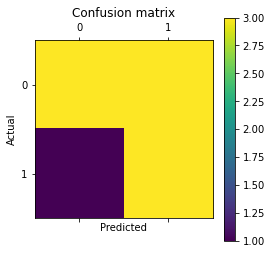

In [34]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Now, let's try the (Gaussian) naive Bayes classifier:

In [35]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train_norm, vs_target_train)
nbpreds_test = nbclf.predict(vs_test_norm)
print (nbpreds_test)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']


In [36]:
print (nbclf.score(vs_train_norm, vs_target_train))

0.75


In [37]:
print (nbclf.score(vs_test_norm, vs_target_test))

0.9


#### Finally, let's try linear discriminant analysis:

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)
ldpreds_test = ldclf.predict(vs_test)
print (ldpreds_test)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']


In [39]:
print (ldclf.score(vs_test, vs_target_test))

0.9


#### In this final example, I demonstrate how to use the cross-validation module from scikit-learn. This allows for n-fold cross validation without the necessity to split the data set manually.

In [40]:
from sklearn import model_selection

In [41]:
cv_scores = model_selection.cross_val_score(treeclf, vs_matrix, vs_target, cv=5) # you pass a classifier, which you have trained
cv_scores

array([0.5, 0.5, 0.9, 0.4, 0.7])

### You did training 5 times and you got five accuracies, which are much lower in general
### because 0.8 was good for one split, but in a nother split you got 0.455, another split you got 0.4, e.t.c
### not very good accurancies

In [42]:
# you can look at the average and the standard deviation
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))
# This is a more robust strategy, which shows how your classifier is doing. 
# you could put the standard deviation in percentage and show that it is too high and we realize that this classifier is not all that good.  

Overall Accuracy: 0.60 (+/- 0.36)


#### Visualizing the decision tree

In [43]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns) # trying to build a tree and visualize it.

In [50]:
from sklearn.neighbors import NearestCentroid


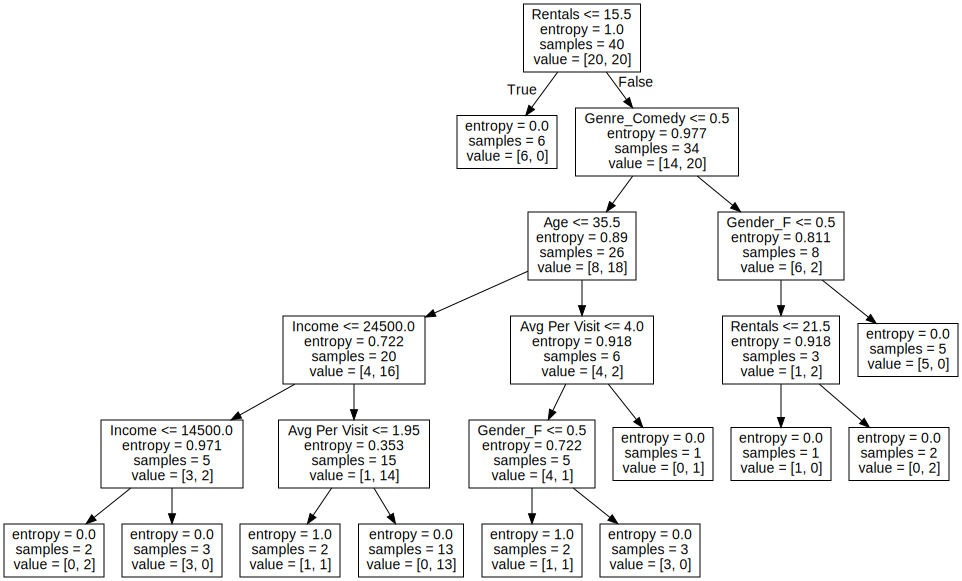

In [48]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Alternatively, you can use GraphViz or some other tool outside Jupyter environment to convert the dot file into an image file (e.g., a .png file) and save it to a local directory. Then, the image can be displayed in Jupyter as follows.

In [46]:
system(dot -Tpng tree.dot -o dtree.png)

[]

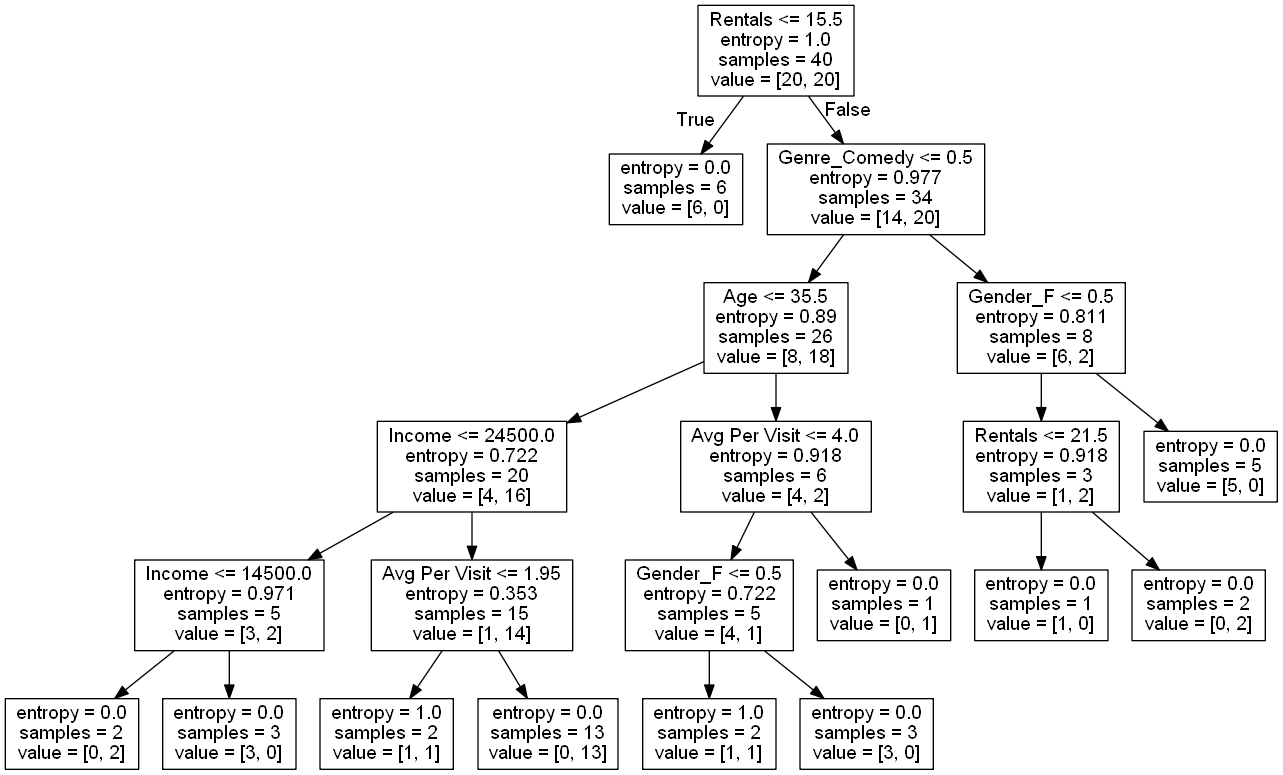

In [47]:
from IPython.display import Image
Image(filename='dtree.png', width=800)